In [1]:
import pandas as pd
from pathlib import Path
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook

In [5]:
# praw_file_path = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_askreddit.csv")
# praw_askreddit_df_part1 = pd.read_csv(praw_file_path, low_memory=False) 
# praw_file_path = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_askreddit_2.csv")
# praw_askreddit_df_part2 = pd.read_csv(praw_file_path, low_memory=False) 
# praw_askreddit_df = pd.concat([praw_askreddit_df_part1, praw_askreddit_df_part2], ignore_index=True)
# complete_file_path = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_askreddit_all_data.csv")
# praw_askreddit_df.to_csv(complete_file_path, index=False)

In [2]:
complete_file_path = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_askreddit_all_data.csv")
praw_askreddit_df = pd.read_csv(complete_file_path, low_memory=False)

In [2]:
file1 = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_clean_data.csv")
file2 = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_data.csv")
file3 = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/pushift_askreddit.csv")
file4 = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/pushift_askreddit_2.csv")
file5 = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/pushift_data.csv")

In [3]:
df1 = pd.read_csv(file1, low_memory=False) #nostupidquestions from praw - 49 columns
df2 = pd.read_csv(file2, low_memory=False) #nostupidquestions from praw - all columns
df3 = pd.read_csv(file3, low_memory=False) #two columns
df4 = pd.read_csv(file4, low_memory=False)
df5 = pd.read_csv(file5, low_memory=False)

In [18]:
df5['url']

0        https://www.reddit.com/r/NoStupidQuestions/com...
1        https://www.reddit.com/r/NoStupidQuestions/com...
2        https://www.reddit.com/r/NoStupidQuestions/com...
3        https://www.reddit.com/r/NoStupidQuestions/com...
4        https://www.reddit.com/r/NoStupidQuestions/com...
                               ...                        
99995    https://www.reddit.com/r/NoStupidQuestions/com...
99996    https://www.reddit.com/r/NoStupidQuestions/com...
99997    https://www.reddit.com/r/NoStupidQuestions/com...
99998    https://www.reddit.com/r/NoStupidQuestions/com...
99999    https://www.reddit.com/r/NoStupidQuestions/com...
Name: url, Length: 100000, dtype: object

In [ ]:
len(praw_askreddit_df)

In [7]:
start_timestamp = praw_askreddit_df['created_utc'].min()
end_timestamp = praw_askreddit_df['created_utc'].max()

start_date = dt.datetime.fromtimestamp(start_timestamp)
end_date = dt.datetime.fromtimestamp(end_timestamp)

print(str(start_date) + " - " + str(end_date))

## Cleaning and EDA

In [3]:
# drop columns which have only one value or all null
columns = list(praw_askreddit_df.columns)
columns_to_drop = []
for column in columns:
    if len(praw_askreddit_df[column].unique()) == 1:
        columns_to_drop.append(column)
# work on a copy of the DataFrame        
praw_askreddit_df_copy =  praw_askreddit_df.drop(columns_to_drop, axis=1) 

In [ ]:
praw_askreddit_df_copy.info(verbose=True, show_counts=True)

### 0 -  _reddit

In [ ]:
praw_askreddit_df_copy['_reddit']

In [ ]:
praw_askreddit_df_copy['_reddit'].value_counts()

In [4]:
praw_askreddit_df_copy.drop(['_reddit'], axis=1, inplace=True) # Praw reddit object

### 1 - selftext

In [ ]:
praw_askreddit_df_copy['selftext'].value_counts()

AskReddit rule 1: Questions must be clear and direct and may not use the body textbox

In [ ]:
not_removed_selftext = (praw_askreddit_df_copy['selftext'] != '[removed]') & (praw_askreddit_df_copy['selftext'] != '[deleted]') & (praw_askreddit_df_copy['selftext'] != '[usunięte]') & (praw_askreddit_df_copy['selftext'] != '[usunięto]') & (praw_askreddit_df_copy['selftext'] != '.') & (praw_askreddit_df_copy['selftext'] != '...') & (praw_askreddit_df_copy['selftext'] != '**')
not_removed_selftext_df = praw_askreddit_df_copy[not_removed_selftext]

In [ ]:
not_removed_selftext_df = not_removed_selftext_df.dropna(subset=['selftext'])

In [ ]:
not_removed_selftext_df['score'].value_counts().index

In [ ]:
not_removed_selftext_df[not_removed_selftext_df['score'] == 99382]

In [ ]:
not_removed_selftext_df.loc[893067,'link_flair_text']

In [ ]:
not_removed_selftext_df.loc[893067,'title']

In [ ]:
not_removed_selftext_df.loc[893067,'selftext']

In [ ]:
not_removed_selftext_df.loc[893067,'distinguished']

In [ ]:
not_removed_selftext_df[not_removed_selftext_df['score'] == 99382]

In [ ]:
not_removed_selftext_df[not_removed_selftext_df['score'] == 76492]

In [ ]:
not_removed_selftext_df.loc[719805,'title']

In [ ]:
not_removed_selftext_df.loc[719805,'selftext']

In [ ]:
not_removed_selftext_df.loc[719805,'distinguished']

In [ ]:
dt.datetime.fromtimestamp(not_removed_selftext_df.loc[719805,'created_utc'])

The 2020 United States presidential election was the 59th quadrennial presidential election, held on Tuesday, November 3

In [ ]:
not_removed_selftext_df[not_removed_selftext_df['score'] == 3870]

In [ ]:
not_removed_selftext_df.loc[1818589,'title']

In [ ]:
not_removed_selftext_df.loc[1818589,'selftext']

In [ ]:
dt.datetime.fromtimestamp(not_removed_selftext_df.loc[1818589,'created_utc'])

In [ ]:
not_removed_selftext_df.loc[1818589,'url']

An archived post is a post that is over 180 days old, which is roughly 6 months. In archived posts, no votes can be changed and no new comments can be made.

In [ ]:
not_removed_selftext_df.loc[1818589,'archived']

In [ ]:
not_removed_selftext_df[not_removed_selftext_df['score'] == 577]

In [ ]:
not_removed_selftext_df.loc[1404404,'title']

In [ ]:
not_removed_selftext_df.loc[1404404,'selftext']

In [ ]:
not_removed_selftext_df.loc[1404404,'archived']

In [ ]:
not_removed_selftext_df[not_removed_selftext_df['score'] < 577]

In [ ]:
not_removed_selftext_df[(not_removed_selftext_df['score'] < 577) & (not_removed_selftext_df['edited'] != 'False')]

1. 1 post - (moderator post) breaking news score = 99382
2. 1 post - moderator announcement score = 76492
3. 75 posts - edited (added text in body textbox)
4. 50 posts have some text

* probably will not be training on moderator posts. They are outliers
* selftext column is either empty or edited after publishing -> unnecessary feature 

In [5]:
praw_askreddit_df_copy.drop([893067,719805], axis=0, inplace=True)

In [6]:
praw_askreddit_df_copy.drop('selftext', axis=1, inplace=True)

### 2 - gilded

In [ ]:
praw_askreddit_df_copy['gilded'].value_counts() # how may gildings the post received

In [ ]:
gilded_submissions_df = praw_askreddit_df_copy[praw_askreddit_df_copy['gilded'] != 0]

In [ ]:
len(gilded_submissions_df)

In [ ]:
gilded_submissions_df['gilded'].value_counts()

In [ ]:
gilded_submissions_df.boxplot(column=['score'], by = ['gilded'])

### 3 - title

In [ ]:
title_length = praw_askreddit_df_copy['title'].apply(lambda x : len(x.split())).rename("title_length")

In [ ]:
title_length.min()

In [ ]:
title_length.max()

In [ ]:
title_length.hist(bins=[0,5,10,15,20,25,30,150])

In [ ]:
plt.xlabel("Title length") 
plt.ylabel("Score") 
plt.scatter(x=title_length, y=praw_askreddit_df_copy['score'], s=5)

In [ ]:
plt.boxplot(title_length)

In [ ]:
copy = pd.concat([praw_askreddit_df_copy, title_length],axis=1)

In [ ]:
copy[copy['title_length'] > 70]['title']

In [ ]:
copy.loc[1382836, 'url']

In [ ]:
#TODO:
# remove stop words and such, a, on, to, the....
# most used words 
# least used words

### 4 - link_flair_richtext

In [ ]:
praw_askreddit_df_copy['link_flair_richtext'].value_counts()

In [ ]:
link_flair_richtext_df[link_flair_richtext_df['link_flair_richtext'] == "[{'e': 'text', 't': '/r/IAmA Request'}]"]

In [ ]:
link_flair_richtext_df.loc[333541,'title']

In [ ]:
link_flair_richtext_df.loc[333541,'score']

In [ ]:
link_flair_richtext_df.loc[333541,'url']

This post is referenced to 'Ask me anything' subreddit.
also delete this post

In [7]:
praw_askreddit_df_copy.drop(333541, axis=0, inplace=True)

### 5 - link_flair_css_class

In [ ]:
praw_askreddit_df_copy['link_flair_css_class'].value_counts()

In [ ]:
praw_askreddit_df_copy[praw_askreddit_df_copy['link_flair_css_class'] == 'serious']

This information is also in other columns (link_flair_richtext for example). Delete column

In [8]:
praw_askreddit_df_copy.drop(['link_flair_css_class'], axis=1, inplace=True)

### 6 - top awarded type

In [ ]:
praw_askreddit_df_copy['top_awarded_type'].value_counts()

### 7 - name

In [ ]:
praw_askreddit_df_copy['name'].value_counts() # full submission id / fullname

### 8 - link_flair_text_color

In [ ]:
praw_askreddit_df_copy['link_flair_text_color'].value_counts()

In [9]:
praw_askreddit_df_copy.drop('link_flair_text_color', axis=1, inplace=True)

### 9 - upvote_ratio

In [ ]:
praw_askreddit_df_copy['upvote_ratio'].value_counts() # upvotes/total votes

### 10 - ups

In [ ]:
praw_askreddit_df_copy['ups'].value_counts()

In [ ]:
praw_askreddit_df_copy['ups'].equals(praw_askreddit_df_copy['score'])

redumdant column

In [10]:
praw_askreddit_df_copy.drop('ups', axis=1, inplace=True)

### 11- total_awards_received

In [ ]:
praw_askreddit_df_copy['total_awards_received'].value_counts()

In [ ]:
# ציון כפונקציה של מס פרסים. האם יש מישהו שקיבלת פרסים על כמה פוסטים, מה מיוחד בפוסטים שקיבלו ממש הרבה פרסים. נניח לבנות היסטוגרמה לפי עשרות עד 100 ואז 200 ומעל 200

### 12 - link_flair_text

In [ ]:
praw_askreddit_df_copy['link_flair_text'].value_counts()

[serious] before post text

In [ ]:
# ציון כפונקציה של הטקסט. אפשר להשתמש בפיצ'ר הזה כבינארי במקרה הזה. 
# אם יש פלייר אחר בפוסט חדש אז צריך להוסיף פיצ'ר חדש במקרה הזה

### 13 - score

In [ ]:
praw_askreddit_df_copy['score'].value_counts()

In [ ]:
bins_list=[0,100,20000,40000]
praw_askreddit_df_copy['score'].hist(bins=bins_list)

### 14 - thumbnail

In [ ]:
praw_askreddit_df_copy['thumbnail'].value_counts()

In [ ]:
# only nsfw and spoiler are relevant info.
# is_spoiler, is_nsfw

### 15 - edited

In [ ]:
praw_askreddit_df_copy['edited'].value_counts()

In [ ]:
edited_df = praw_askreddit_df_copy[praw_askreddit_df_copy['edited'] != 'False']

In [ ]:
edited_df.boxplot(column=['score'])

In [ ]:
len(edited_df)

In [ ]:
# change values to True - edited, not_edited.
# edited vs not edited scores
# how long after posting were they edited

In [ ]:
unedited_df = praw_askreddit_df_copy[praw_askreddit_df_copy['edited'] == 'False']

In [ ]:
unedited_df.boxplot(column=['score'])

### 16 - gildings

In [ ]:
praw_askreddit_df_copy['gildings'].value_counts()

In [ ]:
# 3 columns: gid1, gid2, gid3 - just for statistics. not a feature for the model

### 17 - created

In [ ]:
# date, hour of day, day of week, week in year

### 18 - link_flair_type

In [ ]:
praw_askreddit_df_copy['link_flair_type'].value_counts()

In [11]:
praw_askreddit_df_copy.drop('link_flair_type', axis=1, inplace=True)

### 19 - wls

In [ ]:
praw_askreddit_df_copy['wls'].value_counts() # win lose steak . don't know what this means yet 

### 20 - removed_by_category

In [ ]:
praw_askreddit_df_copy['removed_by_category'].value_counts()

In [ ]:
deleted_by_user_df = praw_askreddit_df_copy[praw_askreddit_df_copy['removed_by_category'] == 'deleted']

 this post was deleted by the person who originally posted it.

In [ ]:
deleted_df.loc[1999294,'url']

In [ ]:
removed_by_moderator_df = praw_askreddit_df_copy[praw_askreddit_df_copy['removed_by_category'] == 'moderator']

Sorry, this post has been removed by the moderators of r/AskReddit.
Moderators remove posts from feeds for a variety of reasons, including keeping communities safe, civil, and true to their purpose.

In [ ]:
removed_by_moderator_df.loc[1999283,'url']

In [ ]:
removed_by_moderator_df['score'].value_counts()

In [ ]:
removed_by_reddit_df = praw_askreddit_df_copy[praw_askreddit_df_copy['removed_by_category'] == 'reddit']

Sorry, this post was removed by Reddit's spam filters.
Reddit's automated bots frequently filter posts it thinks might be spam.

In [ ]:
removed_by_reddit_df.loc[18,'url']

In [ ]:
len(removed_by_reddit_df[removed_by_reddit_df['score']>100])

In [ ]:
removed_by_automod_df = praw_askreddit_df_copy[praw_askreddit_df_copy['removed_by_category'] == 'automod_filtered']

In [ ]:
removed_by_automod_df['score'].value_counts()

Post is awaiting moderator approval.
This post is currently awaiting approval by the moderators of r/AskReddit before it can appear in the subreddit.

In [ ]:
removed_by_anti_evil_ops_df = praw_askreddit_df_copy[praw_askreddit_df_copy['removed_by_category'] == 'anti_evil_ops']

In [ ]:
removed_by_anti_evil_ops_df['score']

Sorry, this post was removed by Reddit's Anti-Evil Operations team.
To keep Reddit and its communities safe, the Anti-Evil Operations team removes posts that violate Reddit's User Agreement and Content Policy .

These post are pretty evil

In [ ]:
content_takedown_df = praw_askreddit_df_copy[praw_askreddit_df_copy['removed_by_category'] == 'content_takedown']

In [ ]:
content_takedown_df['score']

In [ ]:
content_takedown_df['url'].tolist()

Sorry, this post was removed by Reddit's Legal Operations team.
This content was removed for a violation of Reddit's Content Policy .

* deleted by user - keep
* deleted by moderator - keep. There are many high score posts in this category
* detected by reddit as spam - keep. Has many false positives and hight score posts in this category
* automod_filtered Post is awaiting moderator approval - drop
* anti_evil_ops - drop
* content_takedown - drop
- most of them got very low scores so will be filtered out anyway - score > 50

### 21 - allow_live_comments

In [ ]:
praw_askreddit_df_copy['allow_live_comments'].value_counts()

live comments in Reddit app. Deleting this column

In [12]:
praw_askreddit_df_copy.drop('allow_live_comments', axis=1, inplace=True)

### 22 - selftext_html

In [ ]:
praw_askreddit_df_copy['selftext_html'].value_counts()

In [13]:
praw_askreddit_df_copy.drop('selftext_html', axis=1, inplace=True)

### 23 - suggested_sort

In [ ]:
praw_askreddit_df_copy['suggested_sort'].value_counts()

In [14]:
praw_askreddit_df_copy.drop('suggested_sort', axis=1, inplace=True)

### 24 - archived

In [ ]:
praw_askreddit_df_copy['archived'].value_counts()

In [ ]:
archived_df = praw_askreddit_df_copy[praw_askreddit_df_copy['archived'] == True]

In [ ]:
import datetime as dt

start_date = dt.datetime.fromtimestamp(archived_df['created_utc'].min())
end_date = dt.datetime.fromtimestamp(archived_df['created_utc'].max())

print(str(start_date) + " - " + str(end_date))

Posts are archived after 180 days

### 25 - no_follow

### 26 -  is_crosspostable

### 27 - over_18

In [ ]:
praw_askreddit_df_copy['over_18'].value_counts()

In [ ]:
over_18_df = praw_askreddit_df_copy[praw_askreddit_df_copy['over_18'] == True]

In [ ]:
over_18_df['thumbnail'].value_counts() 

All posts with thumbnail nsfw are also 'over_18'

In [ ]:
nsfw_thumbnail = over_18_df[over_18_df['thumbnail'] == 'nsfw']

In [ ]:
nsfw_thumbnail['removed_by_category'].value_counts()

In [ ]:
default_thumbnail = over_18_df[over_18_df['thumbnail'] == 'default']

In [ ]:
default_thumbnail['removed_by_category'].value_counts()

In [ ]:
len(default_thumbnail[default_thumbnail['score'] > 50])

In [ ]:
over_18_not_removed = over_18_df[over_18_df['removed_by_category'].isnull()]

In [ ]:
over_18_not_removed['thumbnail'].value_counts()

nsfw posts weren't removed at all.

In [ ]:
over_18_not_removed[over_18_not_removed['thumbnail'] == 'default']['url'].tolist()

Will use 'over_18' as a feature

### 28 - all_awardings

list of awards.

### 29 -  can_gild

In [ ]:
praw_askreddit_df_copy['can_gild'].value_counts()

### 30 - spoiler

In [ ]:
praw_askreddit_df_copy['spoiler'].value_counts()

In [ ]:
spoilers_df = praw_askreddit_df_copy[praw_askreddit_df_copy['spoiler'] == True]

In [ ]:
spoilers_df['thumbnail'].value_counts()

In [ ]:
nsfw_spoilers_df = spoilers_df[spoilers_df['thumbnail'] == 'nsfw']

In [ ]:
nsfw_spoilers_df['over_18'].value_counts()

These posts have both 'nsfw' and 'spoiler' thumbnails

In [ ]:
only_spoilers_df = spoilers_df[spoilers_df['thumbnail'] == 'spoiler']

In [ ]:
only_spoilers_df['over_18'].value_counts()

These posts have just the 'spoiler' thumbnail

In [ ]:
default_spoilers_df = spoilers_df[spoilers_df['thumbnail'] == 'default']

In [ ]:
default_spoilers_df['over_18'].value_counts()

In [ ]:
default_spoilers_df

In [ ]:
default_spoilers_df['url'].tolist()

In [ ]:
spoilers_df['removed_by_category'].value_counts()

In [ ]:
spoilers_df['score'].describe()

all spoilers have 'spoiler' thumbnail. will be using this feature

### 31 - locked

In [ ]:
praw_askreddit_df_copy['locked'].value_counts()

In [ ]:
praw_askreddit_df_copy[praw_askreddit_df_copy['locked'] == True]['score']

these will be filtered out

### 32 - treatment_tags

In [ ]:
praw_askreddit_df_copy['treatment_tags'].value_counts()

In [ ]:
praw_askreddit_df_copy[praw_askreddit_df_copy['treatment_tags'] != '[]']['url'].tolist()

deleting this column

In [15]:
praw_askreddit_df_copy.drop('treatment_tags', axis=1, inplace=True)

### 33 - distinguished

In [ ]:
praw_askreddit_df_copy['distinguished'].value_counts()

In [16]:
praw_askreddit_df_copy.drop('distinguished', axis=1, inplace=True)

### 34 - removal_reason

In [ ]:
praw_askreddit_df_copy['removal_reason'].value_counts()

In [17]:
praw_askreddit_df_copy.drop('removal_reason', axis=1, inplace=True)

### 35 - link_flair_background_color

In [ ]:
praw_askreddit_df_copy['link_flair_background_color'].value_counts()

Serious thumbnail posts are green

In [18]:
praw_askreddit_df_copy.drop('link_flair_background_color', axis=1, inplace=True)

### 36 - id

### 37 - is_robot_indexable

In [ ]:
praw_askreddit_df_copy['is_robot_indexable'].value_counts()

In [ ]:
unindexable_df = praw_askreddit_df_copy[praw_askreddit_df_copy['is_robot_indexable'] == False]

In [ ]:
unindexable_df['score'].value_counts()

In [ ]:
# group by - box plot score

### 38 - author

In [ ]:
author_counts = praw_askreddit_df_copy['author'].value_counts()

In [ ]:
len(author_counts)

In [ ]:
author_counts.describe()

In [ ]:
author_counts.hist(bins=[0,10,20,30,40,50,60,70,80,90,100,200,300,400,500,1000,3000])

In [ ]:
# what is the frequency of an authors posts

### 39 - num_comments

### 40 - send_replies

### 41 - whitelist_status

In [ ]:
praw_askreddit_df_copy['whitelist_status'].value_counts()

In [ ]:
promo_adult_nsfw_df = praw_askreddit_df_copy[praw_askreddit_df_copy['whitelist_status'] == 'promo_adult_nsfw']

In [ ]:
promo_adult_nsfw_df['thumbnail'].value_counts()

In [ ]:
promo_adult_nsfw_df['over_18'].value_counts()

all 'over_18' posts are also 'promo_adult_nsfw'

In [ ]:
all_ads_df = praw_askreddit_df_copy[praw_askreddit_df_copy['whitelist_status'] == 'all_ads']

In [ ]:
all_ads_df['thumbnail'].value_counts()

This column does not add any info. 

In [19]:
praw_askreddit_df_copy.drop('whitelist_status', axis=1, inplace=True)

### 42 - author_flair_text_color

In [ ]:
praw_askreddit_df_copy['author_flair_text_color'].value_counts()

In [20]:
praw_askreddit_df_copy.drop(['author_flair_text_color'], axis=1, inplace=True)

### 43 - permalink

In [ ]:
praw_askreddit_df_copy.loc[0,'permalink']

link without the https://www.reddit.com/ part

### 44 - stickied

In [ ]:
praw_askreddit_df_copy['stickied'].value_counts()

In [ ]:
len(praw_askreddit_df_copy)

In [21]:
praw_askreddit_df_copy.drop(['stickied'], axis=1, inplace=True)

### 45 - url

### 46 - subreddit_subscribers

In [ ]:
print("min "+ str(praw_askreddit_df_copy['subreddit_subscribers'].min()))
print("max " + str(praw_askreddit_df_copy['subreddit_subscribers'].max()))
print("mean " +str(praw_askreddit_df_copy['subreddit_subscribers'].mean()))

In [ ]:
sorted_by_created_utc_df = praw_askreddit_df_copy.sort_values(by='created_utc', axis=0, ascending=True)

In [ ]:
subreddit_subscribers = sorted_by_created_utc_df['subreddit_subscribers'].apply(lambda x: x-31000000)

In [ ]:
len(subreddit_subscribers)

In [ ]:
plt.scatter(range(1999293), subreddit_subscribers)

In [ ]:
len(praw_askreddit_df_copy['created'].unique())

### 47 - created_utc

In [ ]:
# date, hour of day, day of week, week in year

### 48 - num_crossposts

### 49 - author_fullname

author id

### 50 - author_premium

### 51 - author_flair_richtext

In [ ]:
praw_askreddit_df_copy['author_flair_richtext'].value_counts()

In [22]:
praw_askreddit_df_copy.drop('author_flair_richtext',axis=1,inplace=True)

### 52 - author_flair_type

In [ ]:
praw_askreddit_df_copy['author_flair_type'].value_counts()

In [23]:
praw_askreddit_df_copy.drop('author_flair_type',axis=1,inplace=True)

### 53 - author_patreon_flair

In [ ]:
praw_askreddit_df_copy['author_patreon_flair'].value_counts()

In [24]:
praw_askreddit_df_copy.drop('author_patreon_flair',axis=1,inplace=True)

### 54 - link_flair_template_id

In [ ]:
praw_askreddit_df_copy['link_flair_template_id'].value_counts()

In [25]:
praw_askreddit_df_copy.drop('link_flair_template_id',axis=1,inplace=True)

### 55 - author_cakeday

In [ ]:
praw_askreddit_df_copy['author_cakeday'].value_counts()

is submission posten on author cake day - the day someone created a reddit account 

### 56 - post_hint

In [ ]:
praw_askreddit_df_copy['post_hint'].value_counts()

In [26]:
praw_askreddit_df_copy.drop('post_hint',axis=1,inplace=True)

### 57 - preview

In [ ]:
praw_askreddit_df_copy[praw_askreddit_df_copy['preview'].notnull()]['preview'].tolist()

In [27]:
praw_askreddit_df_copy.drop('preview',axis=1,inplace=True)

In [ ]:
praw_askreddit_df_copy.info()

In [28]:
clean_file_path = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/praw_askreddit_clean_data.csv")
praw_askreddit_df_copy.to_csv(clean_file_path)

----------------------------------------------------------------------------------------------------------------------------

## choose threshold

In [29]:
praw_askreddit_score_50_df = praw_askreddit_df_copy[praw_askreddit_df_copy['score'] > 49]

In [ ]:
len(praw_askreddit_score_50_df)

In [ ]:
praw_askreddit_score_50_df['score'].hist()

## Feature engineering

In [30]:
title_lenght = praw_askreddit_score_50_df['title'].apply(lambda x: len(x.split())).rename('title_lenght')

In [ ]:
title_lenght.isnull().sum()

In [32]:
import datetime as dt

In [33]:
def epoch_to_hour(x):
    date = dt.datetime.fromtimestamp(x) 
    return int(date.strftime("%H"))

hour_of_day = praw_askreddit_score_50_df['created_utc'].apply(lambda x: epoch_to_hour(x)).rename('hour_of_day')

In [ ]:
hour_of_day.isnull().sum()

In [34]:
def epoch_to_day_of_week(x):
    date = dt.datetime.fromtimestamp(x)
    return int(date.strftime("%w"))
    
day_of_week = praw_askreddit_score_50_df['created_utc'].apply(lambda x: epoch_to_day_of_week(x)).rename('day_of_week')

In [ ]:
day_of_week.isnull().sum()

In [35]:
def epoch_to_week_of_year(x):
    date = dt.datetime.fromtimestamp(x)
    return int(date.strftime("%U"))
    
week_of_year = praw_askreddit_score_50_df['created_utc'].apply(lambda x: epoch_to_week_of_year(x)).rename('week_of_year')

In [36]:
def epoch_to_date(x):
    date = dt.datetime.fromtimestamp(x)
    return date.strftime("%x")

date = praw_askreddit_score_50_df['created_utc'].apply(lambda x: epoch_to_date(x)).rename('date')

In [37]:
serious_replies = (praw_askreddit_score_50_df['link_flair_text'] == 'Serious Replies Only').astype(int).rename('serious_replies')

In [38]:
is_over_18 = praw_askreddit_score_50_df['over_18'].astype(int)
is_spoiler = praw_askreddit_score_50_df['spoiler'].astype(int)
score = praw_askreddit_score_50_df['score']

In [39]:
features_list = [title_lenght, hour_of_day, day_of_week, week_of_year, serious_replies, is_over_18, is_spoiler, score]
features_df = pd.concat(features_list, axis=1)

In [40]:
features_file_path = Path("C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data/features.csv")
features_df.to_csv(complete_file_path)

In [6]:
import praw

with open('reddit_developer_credentials.txt', 'r') as reddit_credentials:
    lines = reddit_credentials.readlines()
    credentials_dict = {}
    for line in lines:
        credentials = line.split('=')
        credentials_dict[credentials[0]] = credentials[1].strip()
    reddit_credentials.close()    
    

CLIENT_ID = credentials_dict['CLIENT_ID']
CLIENT_SECRET = credentials_dict['CLIENT_SECRET']
PASSWORD = credentials_dict['PASSWORD']
USERNAME = credentials_dict['USERNAME']
USERAGENT = credentials_dict['USERAGENT']

reddit = praw.Reddit(client_id=CLIENT_ID,
                     client_secret=CLIENT_SECRET,
                     password=PASSWORD,
                     username=USERNAME,
                     user_agent=USERAGENT)

In [10]:
praw_askreddit_df[praw_askreddit_df['score']>2000]

,Unnamed: 0,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,...,_comments_by_id,author_fullname,author_premium,author_flair_richtext,author_flair_type,author_patreon_flair,link_flair_template_id,author_cakeday,post_hint,preview
222,222,<praw.reddit.Reddit object at 0x0000015D9F8DF220>,NaN,AskReddit,NaN,[],False,NaN,0,False,...,{},t2_136r3s,True,[],text,False,NaN,NaN,NaN,NaN
1256,1256,<praw.reddit.Reddit object at 0x0000015D9F8DF220>,NaN,AskReddit,NaN,[],False,NaN,0,False,...,{},t2_6xs43d3p,False,[],text,False,NaN,NaN,NaN,NaN
1646,1646,<praw.reddit.Reddit object at 0x0000015D9F8DF220>,NaN,AskReddit,NaN,[],False,NaN,0,False,...,{},t2_8fsn6ugp,False,[],text,False,NaN,NaN,NaN,NaN
2835,2835,<praw.reddit.Reddit object at 0x0000015D9F8DF220>,NaN,AskReddit,NaN,[],False,NaN,0,False,...,{},t2_613os6wa,False,[],text,False,NaN,NaN,NaN,NaN
4097,4097,<praw.reddit.Reddit object at 0x0000015D9F8DF220>,NaN,AskReddit,[removed],[],False,NaN,0,False,...,{},t2_3esvvszc,False,[],text,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993722,1993722,<praw.reddit.Reddit object at 0x00000276F73FF220>,NaN,AskReddit,NaN,[],False,NaN,0,False,...,{},t2_1zjs93lo,False,[],text,False,NaN,NaN,NaN,NaN
1993735,1993735,<praw.reddit.Reddit object at 0x00000276F73FF220>,NaN,AskReddit,NaN,[],False,NaN,0,False,...,{},t2_3vcpgk5t,False,[],text,False,NaN,NaN,NaN,NaN
1994090,1994090,<praw.reddit.Reddit object at 0x00000276F73FF220>,NaN,AskReddit,NaN,[],False,NaN,1,False,...,{},t2_8dhrnx8,False,[],text,False,NaN,NaN,NaN,NaN
1995954,1995954,<praw.reddit.Reddit object at 0x00000276F73FF220>,NaN,AskReddit,[removed],[],False,NaN,1,False,...,{},t2_1trghkm,False,[],text,False,NaN,NaN,NaN,NaN


In [69]:
praw_askreddit_df.loc[1646,'author_fullname']

't2_8fsn6ugp'

In [70]:
praw_askreddit_df.loc[1646,'author']

'HarveyGone'

In [67]:
redditor_info = reddit.info(fullnames=['t2_1zjs93lo'])

In [68]:
for redditor in redditor_info:
    print(redditor.name)

In [71]:
redditor1 = reddit.redditor("HarveyGone")

In [77]:
vars(redditor1)

{'_reddit': <praw.reddit.Reddit at 0x2839799a190>,
 '_fetched': True,
 '_listing_use_sort': True,
 'name': 'HarveyGone',
 'is_employee': False,
 'is_friend': False,
 'subreddit': {'default_set': True,
  'user_is_contributor': False,
  'banner_img': 'https://styles.redditmedia.com/t5_39makr/styles/profileBanner_x2w0nvtsui261.jpg?width=1280&height=384&crop=1280:384,smart&frame=1&s=816e7531ad49300b53fb2b9ad90e139d99a13b9e',
  'restrict_posting': True,
  'user_is_banned': False,
  'free_form_reports': True,
  'community_icon': None,
  'show_media': True,
  'icon_color': '',
  'user_is_muted': False,
  'display_name': 'u_HarveyGone',
  'header_img': None,
  'title': 'HarveyGone',
  'previous_names': [],
  'over_18': False,
  'icon_size': [256, 256],
  'primary_color': '',
  'icon_img': 'https://styles.redditmedia.com/t5_39makr/styles/profileIcon_snoob8ebccec-5c72-44d2-8587-0d3a395a9872-headshot.png?width=256&height=256&crop=256:256,smart&frame=1&s=65d6e1ff723c42dc38fd83b64f2fbde89d9bfc9a',


In [72]:
print(dt.datetime.fromtimestamp(redditor1.created_utc))

2020-10-16 23:54:35


In [73]:
redditor1.trophies() 

[]

In [76]:
for submission in reddit.redditor("HarveyGone").submissions.new():  #year/month...
    created = submission.created_utc
    print(dt.datetime.fromtimestamp(created))
    print(submission.score)
 

2020-12-05 04:36:55
1
2020-12-01 23:39:42
2
2020-12-01 23:18:23
2
2020-12-01 11:53:46
2
2020-12-01 10:29:44
1
2020-12-01 10:27:00
1
2020-12-01 10:24:35
1
2020-12-01 09:16:06
1
2020-12-01 09:15:12
3
2020-12-01 09:11:57
1
2020-12-01 09:09:53
1
2020-12-01 08:59:31
1
2020-12-01 07:36:28
19
2020-11-30 07:54:05
32205
2020-11-02 00:57:26
3
2020-11-02 00:52:07
3
2020-11-02 00:51:16
3
2020-10-31 03:27:09
6
2020-10-30 00:00:48
9
2020-10-28 05:16:28
5


In [ ]:
import nltk
nltk.download('stopwords')

In [149]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
nltk.download('punkt')

In [ ]:
nltk.download('averaged_perceptron_tagger')

In [177]:
import re
# remove punctuations and digits from oldtext

sentence = "I went on a trip to Scotland!!! :)"
# TODO: use nltk to remove punctuation
new_sentence = re.sub(r'[^\w\s]','',sentence)

from nltk.tokenize import word_tokenize
word_tokens = word_tokenize(new_sentence)
word_tokens

['I', 'went', 'on', 'a', 'trip', 'to', 'Scotland']

In [178]:
from nltk.corpus import wordnet

def get_wordnet_pos(word_tokens):
    """Map POS tag to first character lemmatize() accepts"""
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    
    wn_tags = []
    tags = nltk.pos_tag(word_tokens)
    for tag_tuple in tags:
        #tag is a tuple (word,tag)
        word = tag_tuple[0]
        first_letter = tag_tuple[1][0].upper()
        wn_tag = tag_dict.get(first_letter, wordnet.NOUN)
        wn_tags.append((word, wn_tag))

    return wn_tags

In [179]:
tokens_pos_tags = get_wordnet_pos(word_tokens)

In [180]:
filtered_sentence = [w for w in tokens_pos_tags if not w[0].lower() in stop_words] 

In [181]:
filtered_sentence

[('went', 'v'), ('trip', 'n'), ('Scotland', 'v')]

In [ ]:
nltk.download('wordnet')

In [182]:
from nltk.stem import WordNetLemmatizer 
# 1. Init Lemmatizer
lemmatizer = WordNetLemmatizer()

# 3. Lemmatize a Sentence with the appropriate POS tag
#sentence = "The striped bats are hanging on their feet for best"
print([lemmatizer.lemmatize(w[0],w[1]) for w in filtered_sentence])
#> ['The', 'strip', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'best']

['go', 'trip', 'Scotland']


## Cluster sample by score

In [41]:
from sklearn.cluster import KMeans 

In [42]:
X = features_df['score'].to_numpy()
X = X.reshape(-1, 1)

In [43]:
num_of_clusters = 10
KM = KMeans(n_clusters = num_of_clusters, random_state=0) 
KM.fit(X)
labels = pd.DataFrame(KM.labels_, columns=['label'], index=features_df.index)

labeled_df = pd.concat([features_df, labels],axis=1)

In [ ]:
labeled_df['label'].value_counts()

In [45]:
labeled_df_copy = labeled_df.copy()

In [46]:
labeled_df.drop('score', axis=1, inplace=True)

In [56]:
labeled_df['label'].value_counts()

0    8608
8     510
9     234
4     146
5     123
1     118
2     113
6      86
3      32
7       8
Name: label, dtype: int64

In [57]:
score_label_df = labeled_df_copy[['score','label']]
groups = labeled_df_copy.groupby('label')

sorted_medians = groups['score'].median().sort_values()

In [ ]:
sorted_groups_df = pd.DataFrame()
for i in sorted_medians.index:
    group_i = groups.get_group(i)['score'].rename(i)
    print(group_i.name)
    sorted_groups_df = pd.concat([sorted_groups_df, group_i], axis=1) 

In [ ]:
sorted_groups_df

<IPython.core.display.Javascript object>


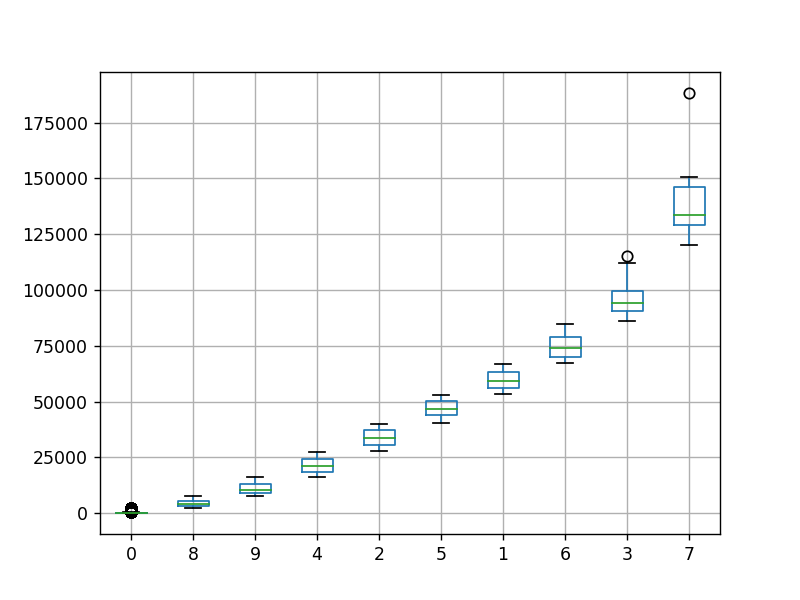

<AxesSubplot:>

In [65]:
sorted_groups_df.boxplot()

In [ ]:
# def compare_clusters(num_of_clusters):
#     sorted_groups_df = pd.DataFrame()
#     for i in num_of_clusters:
#         KM = KMeans(n_clusters = i, random_state=0) 
#         KM.fit(X)
#         labels = pd.DataFrame(KM.labels_, columns=['label'], index=praw_askreddit_score_50_df.index)
#         labeled_df = pd.concat([praw_askreddit_score_50_df, labels],axis=1)
#         score_label_df = labeled_df[['score','label']]
#         groups = score_label_df.groupby('label')
#         sorted_medians = groups['score'].median().sort_values()
#         for j in sorted_medians.index:
#             sorted_groups_df = pd.concat([sorted_groups_df, groups.get_group(j)['score'].rename(str(i)+"."+str(j))], ignore_index=True, axis=1) 
#     sorted_groups_df.boxplot()  

# num_of_clusters_list = [10,5,3]
# compare_clusters(num_of_clusters_list)

## Devide samples into train and validation

In [47]:
median_week = labeled_df['week_of_year'].median()
train = labeled_df[labeled_df['week_of_year'] <= median_week]
validation = labeled_df[labeled_df['week_of_year'] > median_week]
print(len(train))
print(len(validation))

5222
4756


In [124]:
train['label'].value_counts()

0    4521
8     256
9     121
4      72
1      63
5      62
2      59
6      47
3      18
7       3
Name: label, dtype: int64

## Models

### Decision trees

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

feature_cols = ['title_lenght', 'hour_of_day', 'day_of_week', 'serious_replies', 'over_18', 'spoiler']
X_train = train[feature_cols] 
y_train = train['label']

In [126]:
X_valid = validation[feature_cols]
y_valid = validation['label']

In [127]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_valid)

In [133]:
clf.feature_importances_

array([0.36844869, 0.29376469, 0.26247023, 0.03632602, 0.03551294,
       0.00347743])

In [128]:
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.7798570227081582


In [ ]:
from sklearn import tree
tree.plot_tree(clf) 

In [129]:
pd.DataFrame(y_pred).value_counts()

0    4290
8     187
9      75
4      52
5      40
6      40
1      39
2      28
3       4
7       1
dtype: int64

In [130]:
y_pred_df = pd.DataFrame(y_pred, columns=['predicted_label'], index=y_valid.index)
results = pd.concat([y_valid,y_pred_df], axis=1)

In [131]:
results

,label,predicted_label
168,0,0
222,9,0
239,0,0
261,0,0
275,0,0
...,...,...
883090,0,0
883279,8,0
999423,0,0
999645,8,0


In [132]:
result_groups = results.groupby('label')
group_value_counts = pd.DataFrame(index = list(range(10)))
for name, group in result_groups:
    group_value_counts = pd.concat([group_value_counts,group['predicted_label'].value_counts().rename(name)], axis=1)

group_value_counts

,0,1,2,3,4,5,6,7,8,9
0,3694,50.0,47.0,13.0,68.0,50.0,38.0,4.0,229.0,97.0
1,34,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0
2,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,47,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0
5,30,NaN,2.0,1.0,1.0,1.0,NaN,NaN,2.0,3.0
6,35,NaN,NaN,NaN,NaN,1.0,NaN,NaN,4.0,NaN
7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,159,1.0,2.0,NaN,2.0,6.0,NaN,1.0,10.0,6.0
9,60,4.0,NaN,NaN,2.0,1.0,NaN,NaN,5.0,3.0


As expected most of the samples in class 0 got correct predictions.

In [134]:
from sklearn.metrics import classification_report
labels_list=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
print(classification_report(y_valid, y_pred, labels=labels_list))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4087
           1       0.00      0.00      0.00        55
           2       0.00      0.00      0.00        54
           3       0.00      0.00      0.00        14
           4       0.02      0.01      0.02        74
           5       0.03      0.02      0.02        61
           6       0.00      0.00      0.00        39
           7       0.00      0.00      0.00         5
           8       0.05      0.04      0.05       254
           9       0.04      0.03      0.03       113

    accuracy                           0.78      4756
   macro avg       0.10      0.10      0.10      4756
weighted avg       0.74      0.78      0.76      4756



First let's see what happens if we remove class 0

## Balance train labels

In [119]:
# check version number
import imblearn
print(imblearn.__version__)

0.7.0


In [120]:
# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

The minority class has too few samples in the training set. 

In [ ]:
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

## Test set

In [79]:
folder_path = 'C:/Users/iravi/Data Projects/Reddit/reddit_data_project/data'
pushshift_file_path = Path(folder_path, 'pushshift_askreddit_older_posts.csv')
pushshift_test_df = pd.read_csv(pushshift_file_path)

C:\Users\iravi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,9,62,63,64,65,66,69,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
start_timestamp = pushshift_test_df['created_utc'].min()
end_timestamp = pushshift_test_df['created_utc'].max()

start_date = dt.datetime.fromtimestamp(start_timestamp)
end_date = dt.datetime.fromtimestamp(end_timestamp)

print(str(start_date) + " - " + str(end_date))

2020-05-14 00:55:44 - 2020-07-12 06:27:18


In [82]:
len(pushshift_test_df)

999995

In [81]:
pushshift_test_df[pushshift_test_df['score'] > 50]

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,banned_by,post_hint,preview,suggested_sort,edited,gilded,top_awarded_type,link_flair_css_class,thumbnail_height,thumbnail_width
42278,[],False,beaverpoo77,NaN,[],NaN,text,t2_4f99wade,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91160,[],True,Clamps_15,NaN,[],NaN,text,t2_2ibxajyd,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92142,[],False,savag3panda7,NaN,[],NaN,text,t2_4f4tayz6,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98627,[],False,TrippWraze,NaN,[],NaN,text,t2_746rk08j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98797,[],True,Britneyfan456,NaN,[],NaN,text,t2_2q1v419b,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949891,[],True,letsshit,NaN,[],NaN,text,t2_6h9tl6yj,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950066,[],True,RedWestern,NaN,[],NaN,text,t2_1q8u37y8,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952040,[],False,NippleSalsa,NaN,[],NaN,text,t2_nibsi,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952643,[],True,TimeToBecomeEgg,NaN,[],NaN,text,t2_4n74pvm4,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
pushshift_test_df['score'].value_counts()

1        763679
2         81317
3         58514
0         33120
4         28318
          ...  
2222          1
3246          1
17593         1
178           1
509           1
Name: score, Length: 372, dtype: int64

<IPython.core.display.Javascript object>


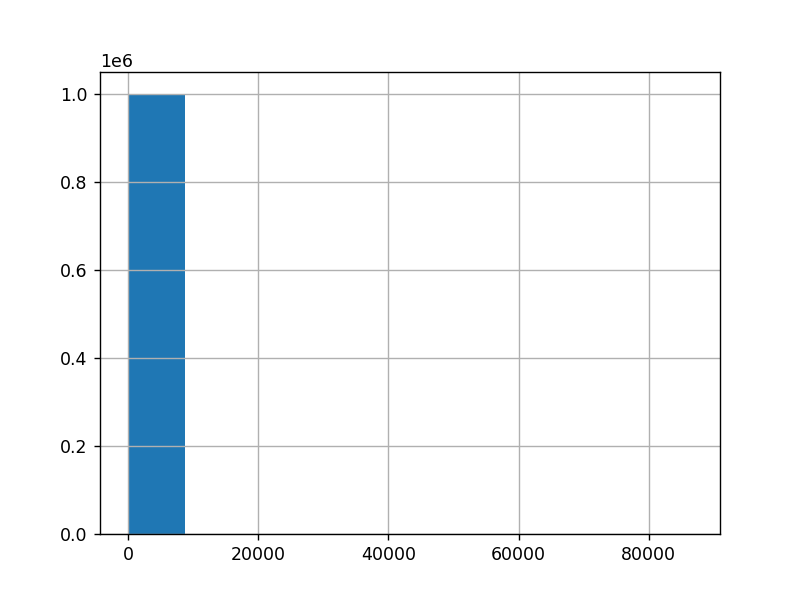

<AxesSubplot:>

In [84]:
pushshift_test_df['score'].hist()

In [97]:
pushshift_test_df[pushshift_test_df['score'] > 50]

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,author_premium,...,banned_by,post_hint,preview,suggested_sort,edited,gilded,top_awarded_type,link_flair_css_class,thumbnail_height,thumbnail_width
42278,[],False,beaverpoo77,NaN,[],NaN,text,t2_4f99wade,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91160,[],True,Clamps_15,NaN,[],NaN,text,t2_2ibxajyd,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92142,[],False,savag3panda7,NaN,[],NaN,text,t2_4f4tayz6,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98627,[],False,TrippWraze,NaN,[],NaN,text,t2_746rk08j,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98797,[],True,Britneyfan456,NaN,[],NaN,text,t2_2q1v419b,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949891,[],True,letsshit,NaN,[],NaN,text,t2_6h9tl6yj,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
950066,[],True,RedWestern,NaN,[],NaN,text,t2_1q8u37y8,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952040,[],False,NippleSalsa,NaN,[],NaN,text,t2_nibsi,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
952643,[],True,TimeToBecomeEgg,NaN,[],NaN,text,t2_4n74pvm4,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
